Generates file(s): data/predetermined-8.pkl

How do the shapes of the error-envelope change as 1 dimensionless quantity changes?

1. Have 1 basic configuration, reasonably high added mass and damping.
2. Pick 1 thing to vary, vary it, plot alpha, beta values.

In [14]:
import sys
import os
sys.path.append(os.path.relpath('../../../'))
sys.path.append(os.path.relpath('../../'))

from helpers import *
import numpy as np
from scipy.optimize import curve_fit

In [2]:
# code to generate data (commented out) + variable definitions
file1 = "data/predetermined-8.pkl"

big_nmk, nmk_max = 200, 150
heaving, NMK, rho = [1, 0, 0], [big_nmk] * 4, 1023

m0 = 1
h = 30
radwidth0 = 0.5
hmdr_base = 25
right_ratio_base = 1.3
rad_ratio_base = 0.2 # split evenly between regions mid and outer
hmd2 = 26

def solve_and_store(h, d, a, heaving, NMK, m0, rho, nmk_max, region = 0):
  prob = ConvergenceProblemI(h, d, a, heaving, NMK, m0, rho)
  mk = prob.m_k
  info = {"h" : h,
          "d" : d,
          "a" : a,
          "region" : region,
          "m0s" : [m0]}
  print(info)
  return merge_dicts(info, prob.convergence_study_over_m0s(nmk_max, [m0], [mk]))

def generate_d_a(h, radwidth0, hmd2, hmdr, right_ratio, rad_ratio):
  hmd0 = hmdr * radwidth0
  radwidth1 = (radwidth0/rad_ratio)/2
  radwidth2 = radwidth1
  hmd1 = right_ratio * hmd0
  radwidths = [radwidth0, radwidth1, radwidth2]
  hmds = [hmd0, hmd1, hmd2]
  a = [sum(radwidths[0:i+1]) for i in range(3)]
  d = [h - hmd for hmd in hmds]
  for i in range(3):
    assert radwidths[i] > 0
    assert d[i] > 0
    assert hmds[i] >= radwidths[i] # This is for the chosen nmk_max.
  return d, a

# all_prob_sets = []
# # base
# prob_set = []
# d, a, = generate_d_a(h, radwidth0, hmd2, hmdr_base, right_ratio_base, rad_ratio_base)
# prob_set.append(solve_and_store(h, d, a, heaving, NMK, m0, rho, nmk_max, region = 0))
# all_prob_sets.append(prob_set)
# update_data_file(all_prob_sets, file1)
# print("Finished base.")

# # hmdr
# hmdrs = list(np.linspace(2, 30, 29))
# prob_set = []
# for hmdr in hmdrs:
#   d, a, = generate_d_a(h, radwidth0, hmd2, hmdr, right_ratio_base, rad_ratio_base)
#   prob_set.append(solve_and_store(h, d, a, heaving, NMK, m0, rho, nmk_max, region = 0))
# all_prob_sets.append(prob_set)
# update_data_file(all_prob_sets, file1)
# print("Finished hmdrs.")

# # right ratio
# right_ratios = list(np.linspace(0.2, 0.9, 8)) + list(np.linspace(0.91, 1.09, 19)) + list(np.linspace(1.1, 2, 9))
# prob_set = []
# for right_ratio in right_ratios:
#   d, a, = generate_d_a(h, radwidth0, hmd2, hmdr_base, right_ratio, rad_ratio_base)
#   prob_set.append(solve_and_store(h, d, a, heaving, NMK, m0, rho, nmk_max, region = 0))
# all_prob_sets.append(prob_set)
# update_data_file(all_prob_sets, file1)
# print("Finished right ratios.")

# # rad ratio
# rad_ratios = list(np.linspace(0.03, 0.25, 23))
# prob_set = []
# for rad_ratio in rad_ratios:
#   d, a, = generate_d_a(h, radwidth0, hmd2, hmdr_base, right_ratio_base, rad_ratio)
#   prob_set.append(solve_and_store(h, d, a, heaving, NMK, m0, rho, nmk_max, region = 0))
# all_prob_sets.append(prob_set)
# update_data_file(all_prob_sets, file1)
# print("Finished rad ratios.")

# # hmdr, but the right ratio < 1
# hmdrs = list(np.linspace(5, 30, 26))
# right_ratio_base = 0.6
# prob_set = []
# for hmdr in hmdrs:
#   d, a, = generate_d_a(h, radwidth0, hmd2, hmdr, right_ratio_base, rad_ratio_base)
#   prob_set.append(solve_and_store(h, d, a, heaving, NMK, m0, rho, nmk_max, region = 0))
# all_prob_sets.append(prob_set)
# update_data_file(all_prob_sets, file1)
# print("Finished second set of hmdrs.")


In [3]:
all_prob_sets = open_pkl_file(file1)
for prob_set in all_prob_sets:
  generate_convergence_data(prob_set, [0.01, 0.005])
  generate_log_data(prob_set)

In [4]:
fs = {"(h-d0)/radwidth0" : lambda cf, m0 : (cf["h"] - cf["d"][0])/cf["a"][0],
      "(h-d1)/(h-d0)" : lambda cf, m0 : (cf["h"] - cf["d"][1])/(cf["h"] - cf["d"][0]),
      "radwidth0/dist_to_e" : lambda cf, m0 : cf["a"][0]/(cf["a"][-1] - cf["a"][0])}

dimensionless_quantities = {"(h-d0)/radwidth0" : [all_prob_sets[1], fs["(h-d0)/radwidth0"]],
                            "(h-d1)/(h-d0)" : [all_prob_sets[2], fs["(h-d1)/(h-d0)"]],
                            "radwidth0/dist_to_e" : [all_prob_sets[3], fs["radwidth0/dist_to_e"]],
                            "(h-d0)/radwidth0 (h-d1/h-d0 < 1)" : [all_prob_sets[4], fs["(h-d0)/radwidth0"]]}

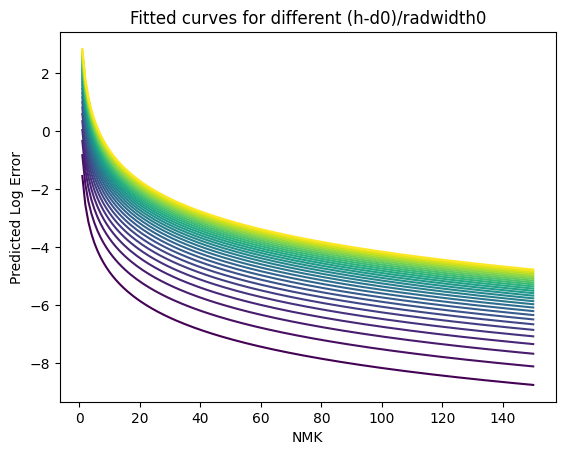

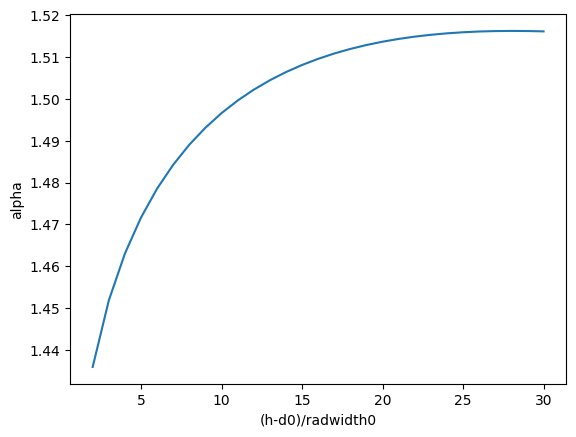

fitted slope: 0.00216, slope/avg: 0.00144


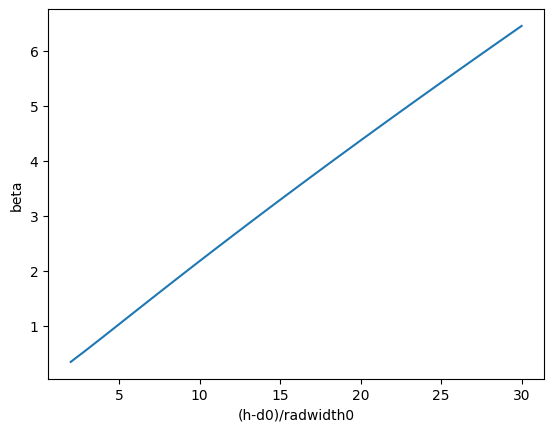

fitted slope: 0.218, slope/avg: 0.0631
Average covariance matrix:
 [[2.26230176e-05 1.10629348e-04]
 [1.10629348e-04 7.73262374e-04]]


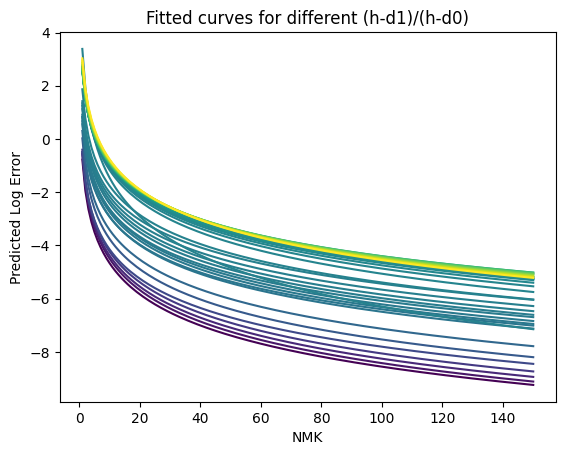

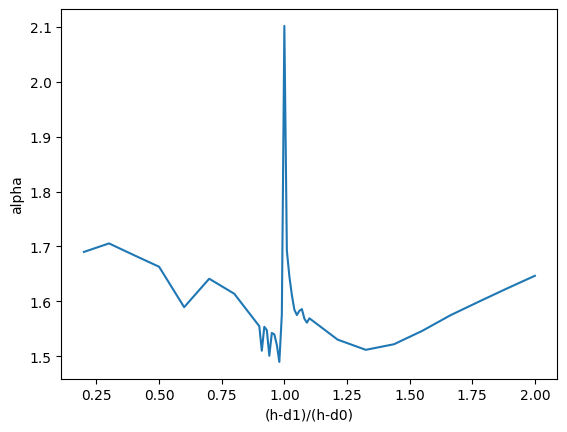

fitted slope: -0.0488, slope/avg: -0.0305


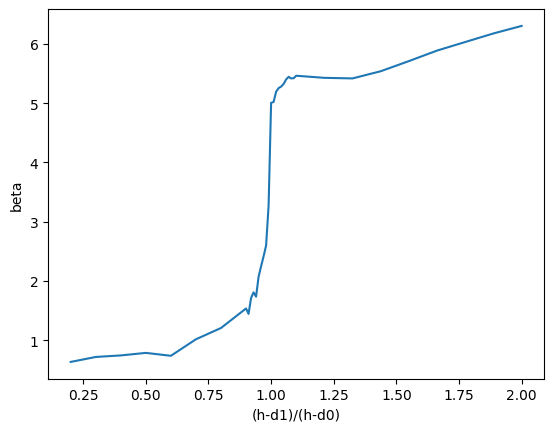

fitted slope: 4.19, slope/avg: 1.15
Average covariance matrix:
 [[0.00058566 0.00292035]
 [0.00292035 0.01836735]]


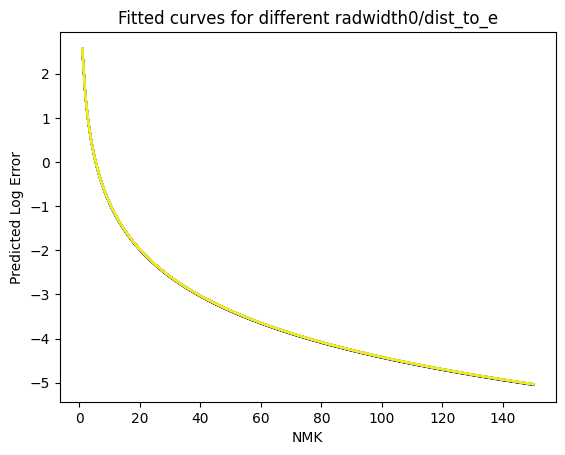

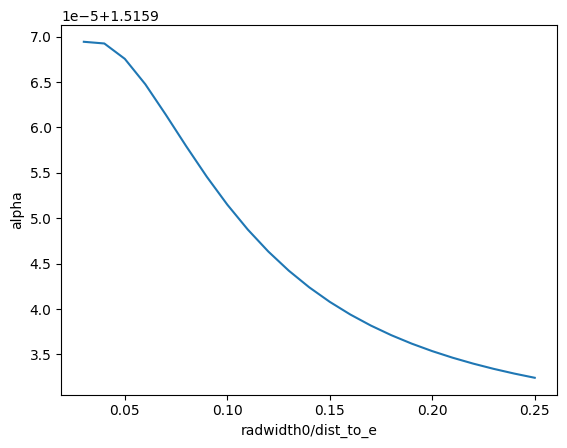

fitted slope: -0.000182, slope/avg: -0.00012


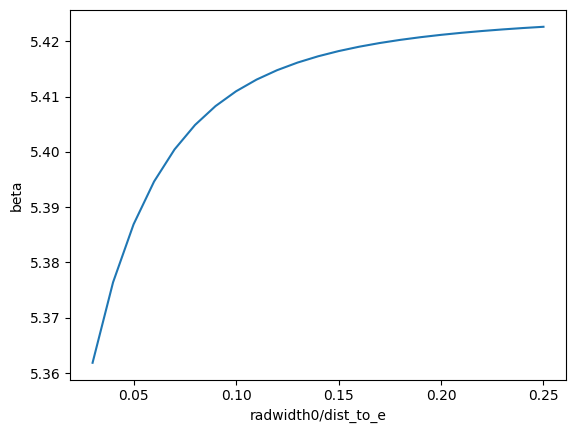

fitted slope: 0.201, slope/avg: 0.0372
Average covariance matrix:
 [[1.34430208e-05 1.12512869e-04]
 [1.12512869e-04 1.09351222e-03]]


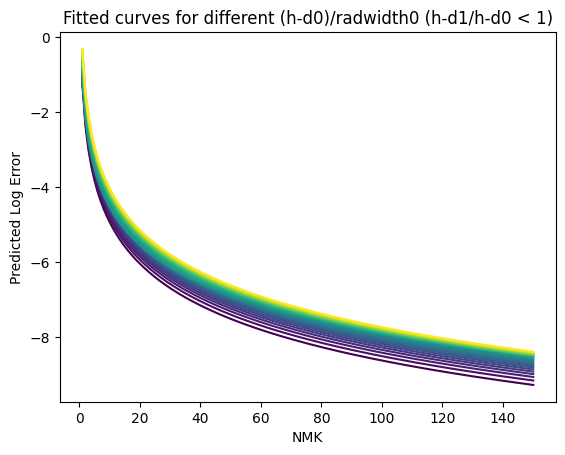

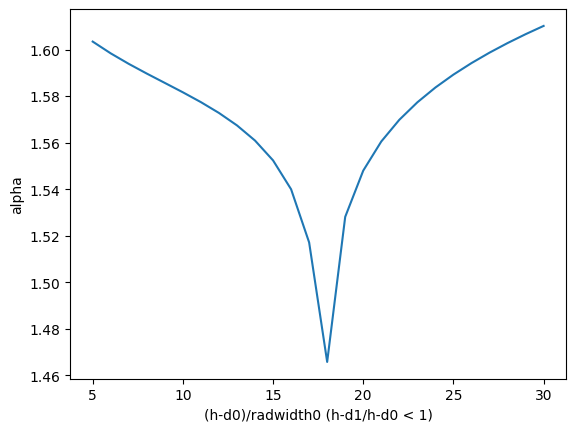

fitted slope: 0.000348, slope/avg: 0.000221


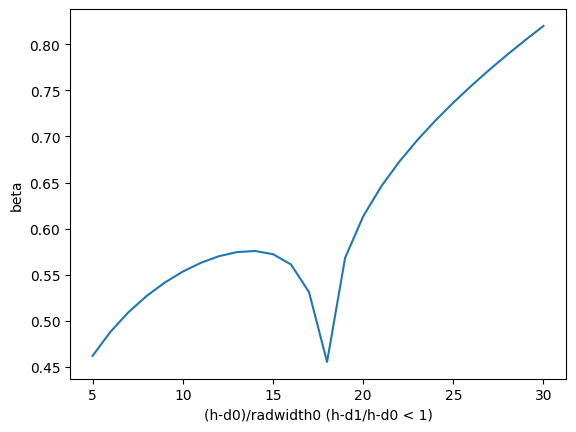

fitted slope: 0.013, slope/avg: 0.021
Average covariance matrix:
 [[0.00092495 0.00163963]
 [0.00163963 0.00307697]]


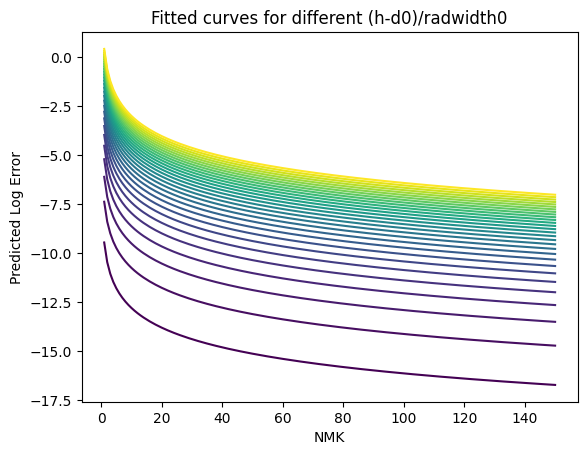

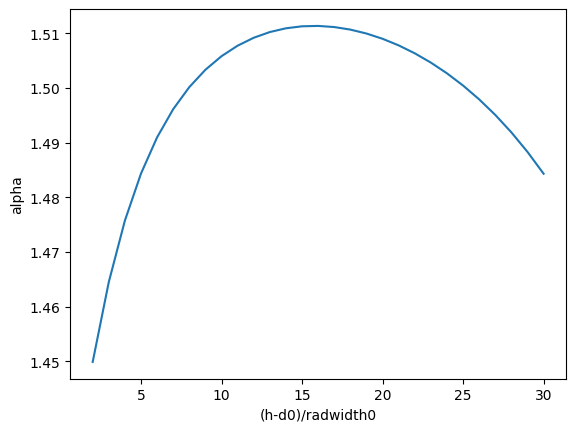

fitted slope: 0.000612, slope/avg: 0.000408


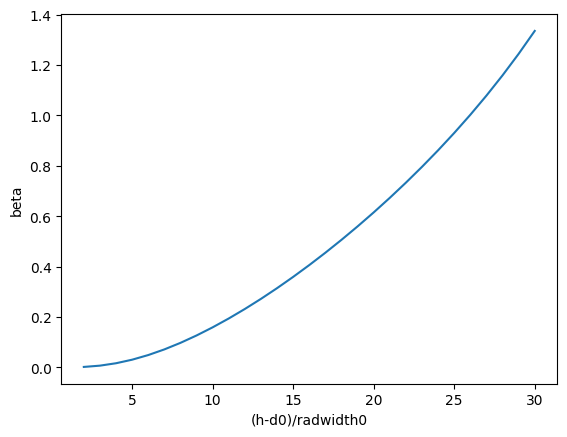

fitted slope: 0.0477, slope/avg: 0.0968
Average covariance matrix:
 [[3.89884234e-05 4.37020315e-05]
 [4.37020315e-05 1.10161617e-04]]


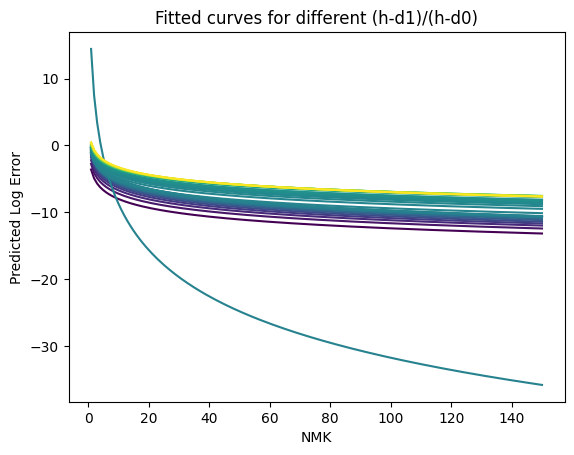

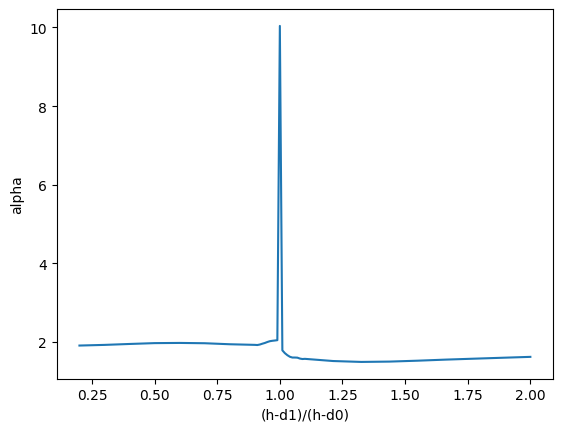

fitted slope: -0.383, slope/avg: -0.19


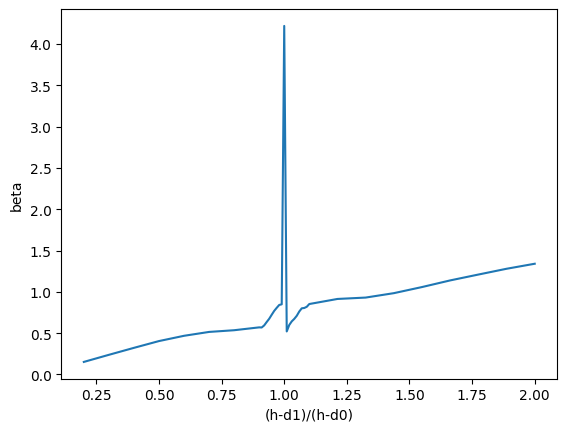

fitted slope: 0.631, slope/avg: 0.759
Average covariance matrix:
 [[0.00258565 0.00318963]
 [0.00318963 0.0046622 ]]


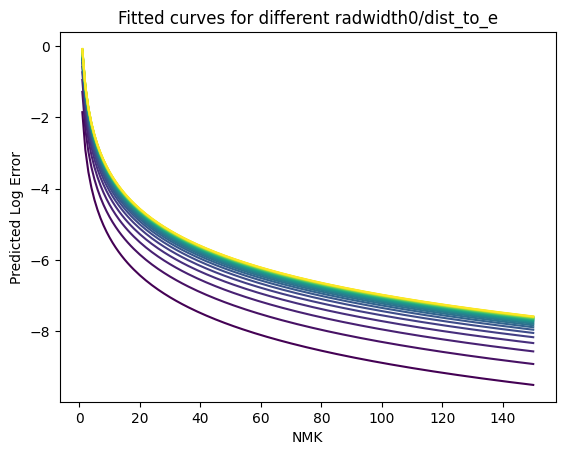

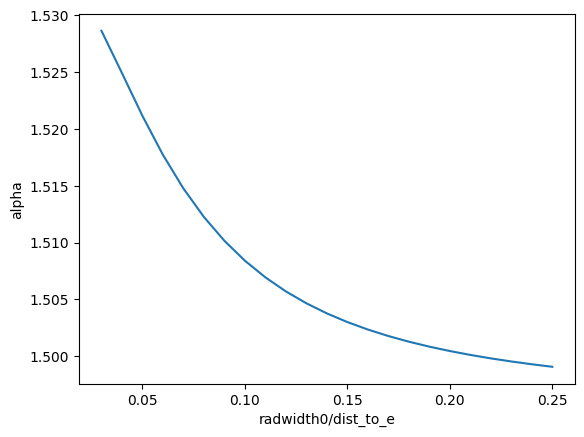

fitted slope: -0.118, slope/avg: -0.0781


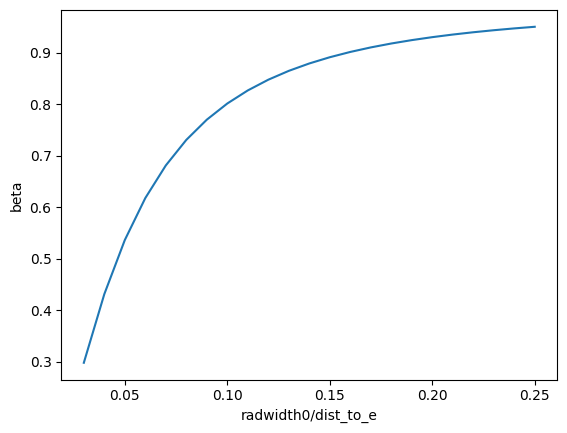

fitted slope: 2.29, slope/avg: 2.85
Average covariance matrix:
 [[2.27827818e-05 5.34293331e-05]
 [5.34293331e-05 1.34643622e-04]]


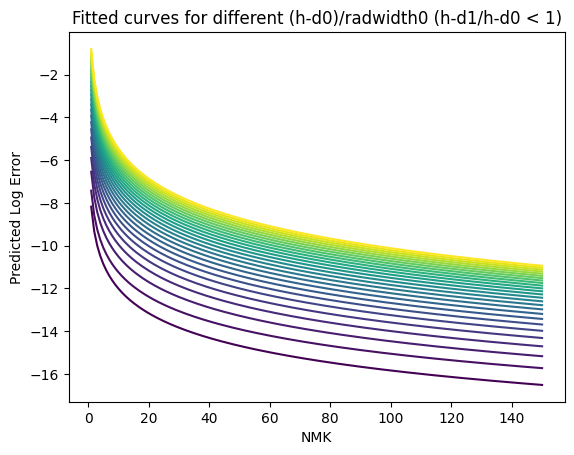

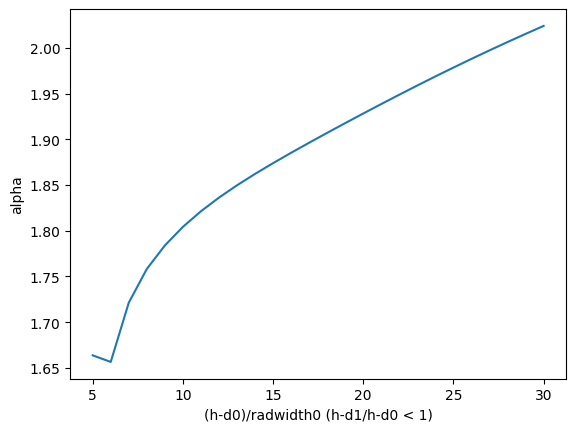

fitted slope: 0.0133, slope/avg: 0.00707


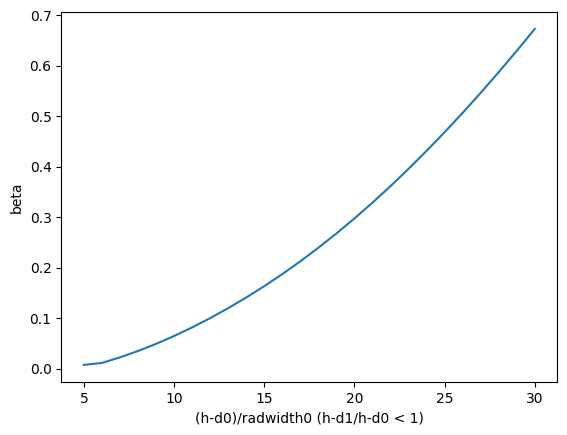

fitted slope: 0.0268, slope/avg: 0.101
Average covariance matrix:
 [[0.00051962 0.00034465]
 [0.00034465 0.00034655]]


In [ ]:
am_r2s = []
dp_r2s = []

for key in dimensionless_quantities.keys():
  info = dimensionless_quantities[key]
  pack = multi_fit_parameters(info[0], info[1], "am", sort_label = key,
                            local_maxima = False, plot_comparison = False,
                            print_params = False, plot_multi_log_comparison = True, plot_multi_params = True,
                            nmk_max = 150, linear_model = False, r2_lin = False)
  am_r2s.append([pack[4], pack[5]])
  avg_pcov = np.mean(pack[3], axis=0)
  print("Average covariance matrix:\n", avg_pcov)

for key in dimensionless_quantities.keys():
  info = dimensionless_quantities[key]
  pack = multi_fit_parameters(info[0], info[1], "dp", sort_label = key,
                            local_maxima = False, plot_comparison = False,
                            print_params = False, plot_multi_log_comparison = True, plot_multi_params = True,
                            nmk_max = 150, linear_model = False, r2_lin = False)
  dp_r2s.append([pack[4], pack[5]])
  avg_pcov = np.mean(pack[3], axis=0)
  print("Average covariance matrix:\n", avg_pcov)

In [5]:
key_lst = list(dimensionless_quantities.keys())
print("ams")
for i in range(len(key_lst)):
  print(key_lst[i])
  print(f"R^2: {min(am_r2s[i][0]):.3g}")
  print(f"R^2 w/ only underestimates: {min(am_r2s[i][1]):.3g}")
print("dps")
for i in range(len(key_lst)):
  print(key_lst[i])
  print(f"R^2: {min(dp_r2s[i][0]):.3g}")
  print(f"R^2 w/ only underestimates: {min(dp_r2s[i][1]):.3g}")

ams
(h-d0)/radwidth0
R^2: 0.996
R^2 w/ only underestimates: 0.997
(h-d1)/(h-d0)
R^2: 0.779
R^2 w/ only underestimates: 0.692
radwidth0/dist_to_e
R^2: 0.999
R^2 w/ only underestimates: 0.999
(h-d0)/radwidth0 (h-d1/h-d0 < 1)
R^2: 0.848
R^2 w/ only underestimates: 0.023
dps
(h-d0)/radwidth0
R^2: 0.992
R^2 w/ only underestimates: 0.992
(h-d1)/(h-d0)
R^2: 0.904
R^2 w/ only underestimates: 0.551
radwidth0/dist_to_e
R^2: 0.998
R^2 w/ only underestimates: 0.996
(h-d0)/radwidth0 (h-d1/h-d0 < 1)
R^2: 0.942
R^2 w/ only underestimates: 0.894


(h-d0)/radwidth0


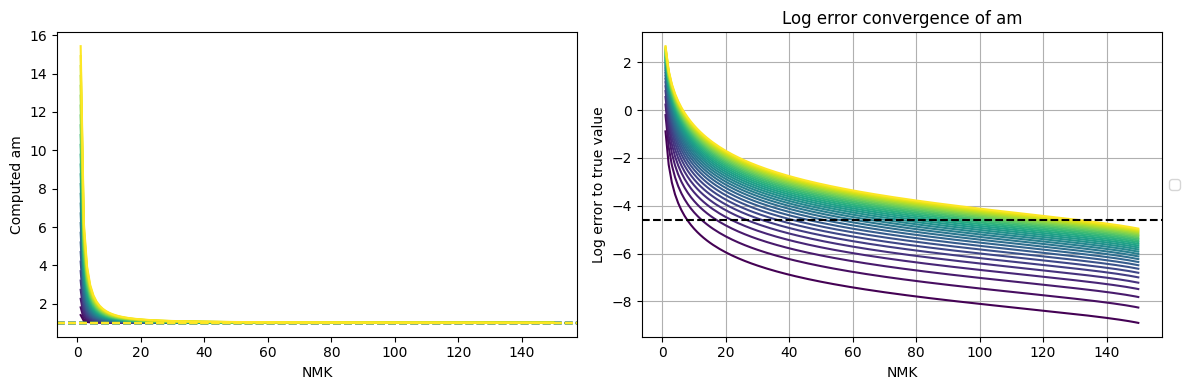

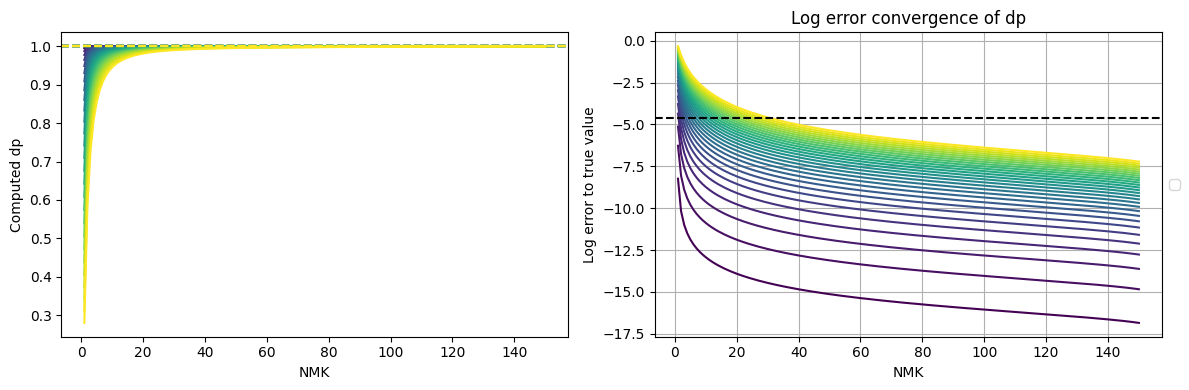

(h-d1)/(h-d0)


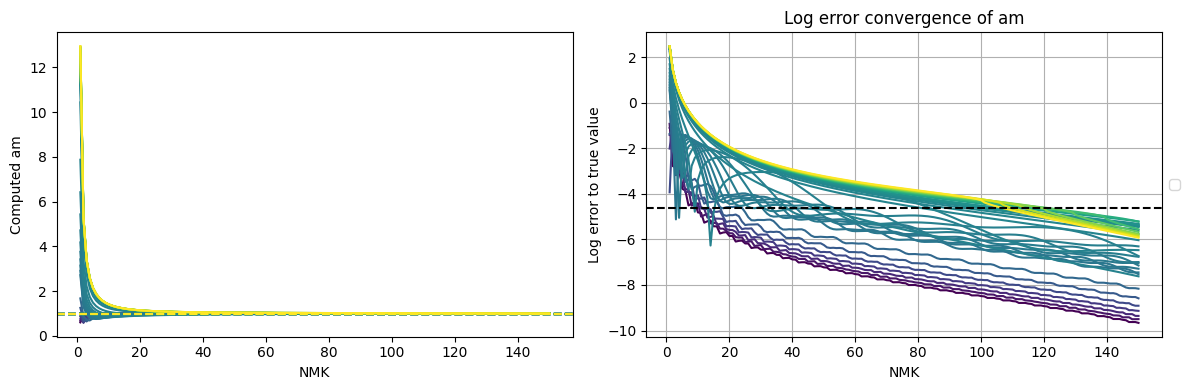

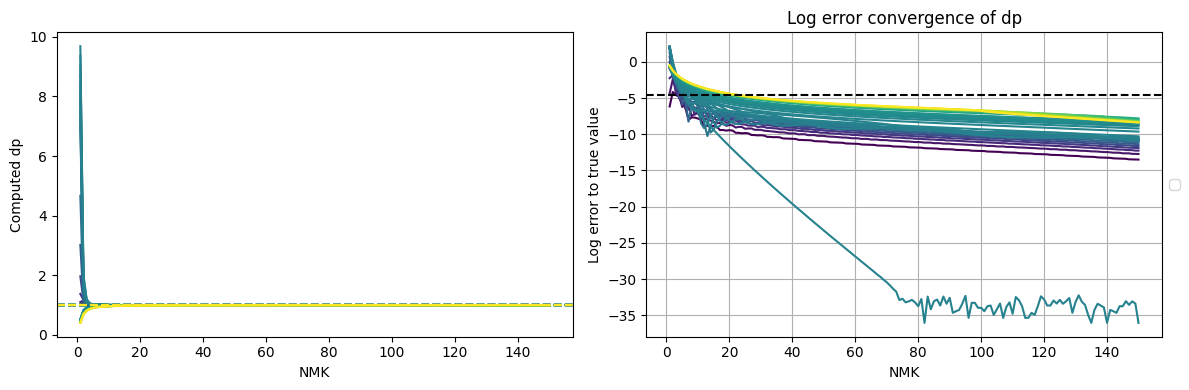

radwidth0/dist_to_e


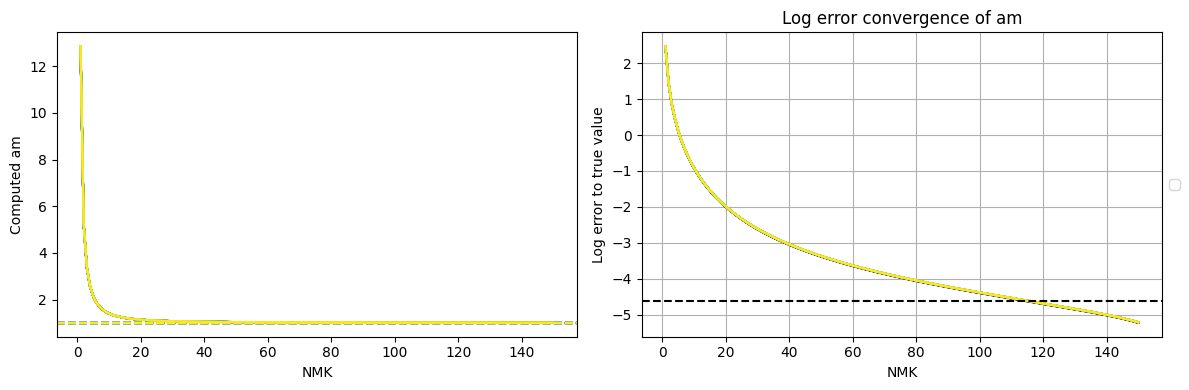

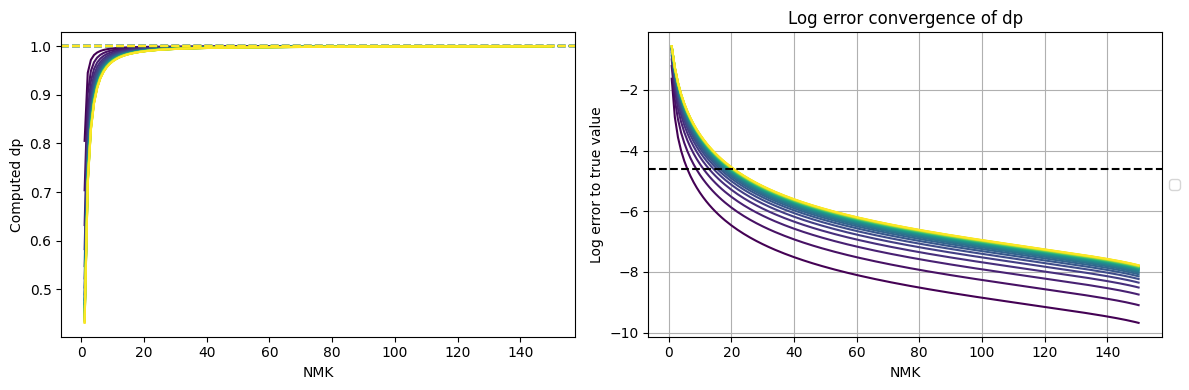

(h-d0)/radwidth0 (h-d1/h-d0 < 1)


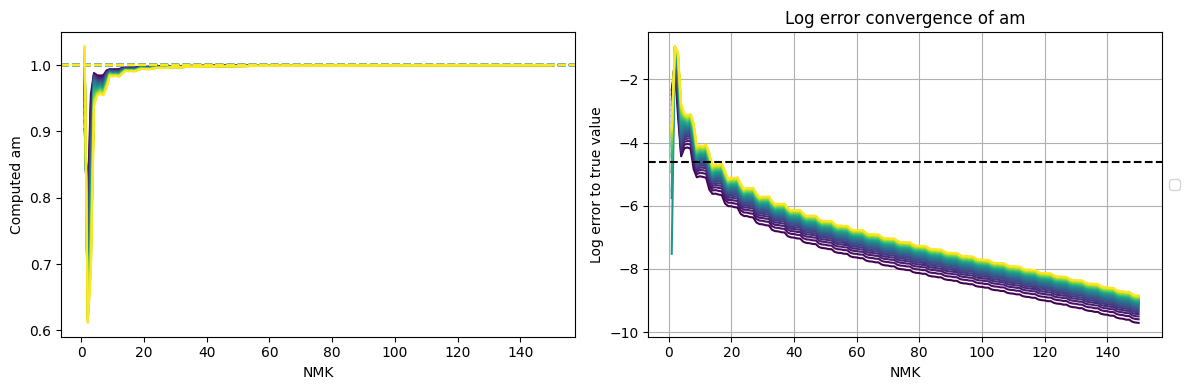

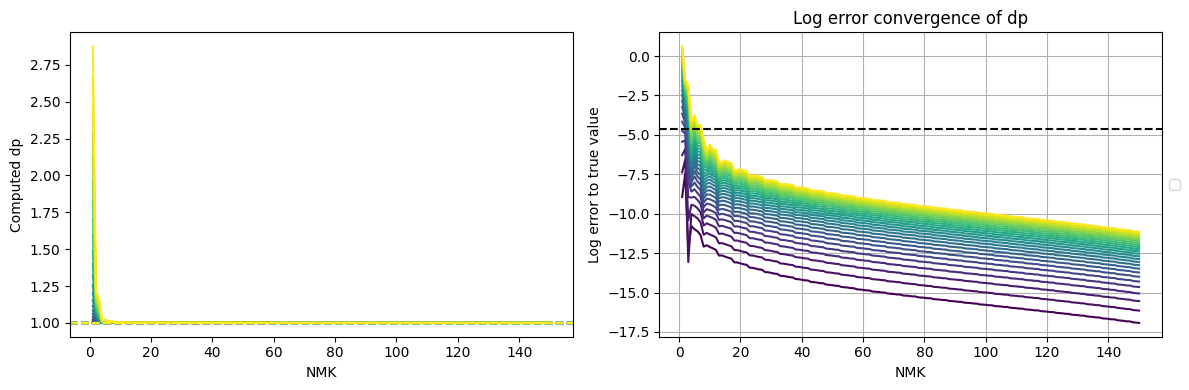

In [10]:
for key in dimensionless_quantities.keys():
  print(key)
  info = dimensionless_quantities[key]
  data = many_data_dicts_to_convergence_plot_data(info[0], all_m0s = True)
  colors = color_by_f_value(info[1], info[0], all_m0s = True)
  plot_set_convergence_and_log(data, "am", colors = colors, scale = True, alpha = 1,
                              label_func = (lambda data_dict, m0 : None), error = 0.01,
                              nmk_max = 150, show_error = True, trunc = 0, smooth = False)
  plot_set_convergence_and_log(data, "dp", colors = colors, scale = True, alpha = 1,
                              label_func = (lambda data_dict, m0 : None), error = 0.01,
                              nmk_max = 150, show_error = True, trunc = 0, smooth = False)

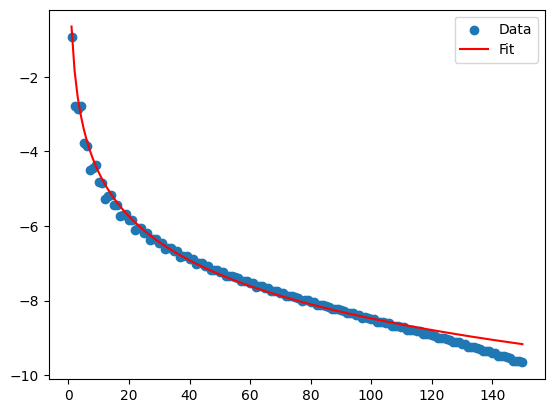

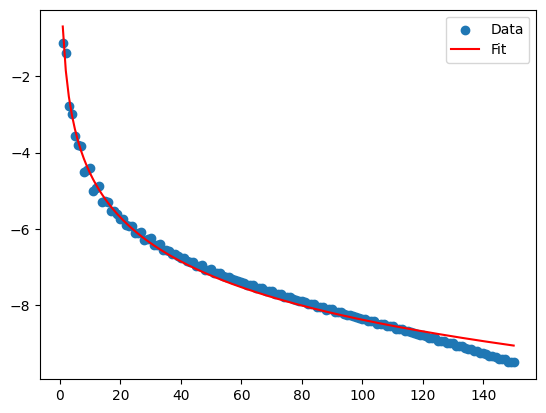

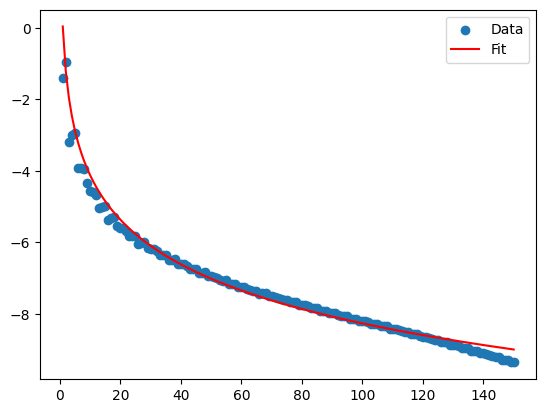

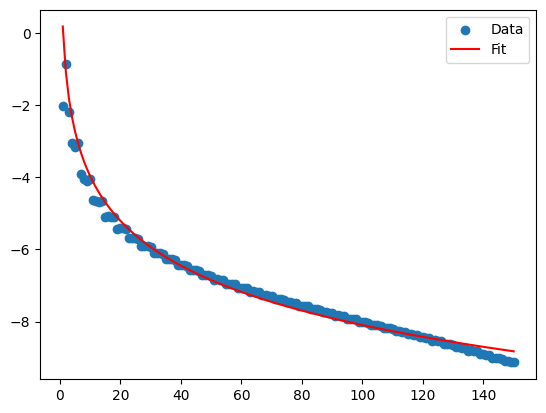

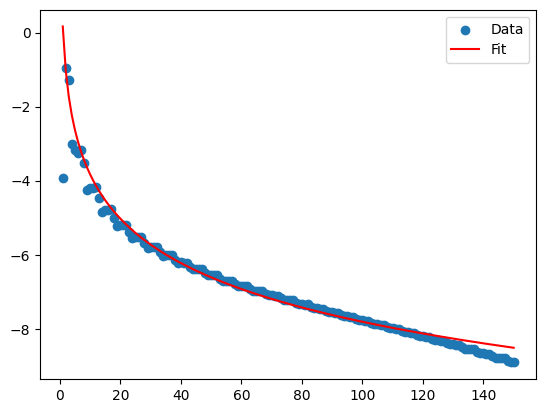

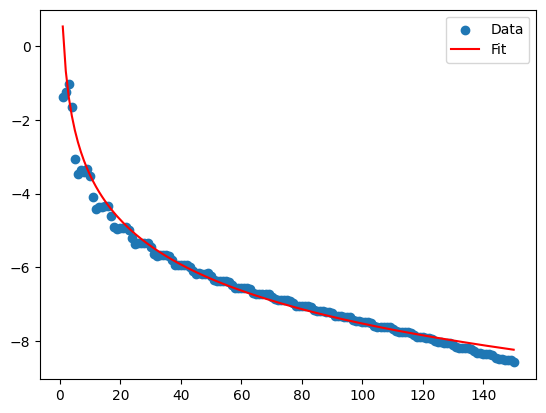

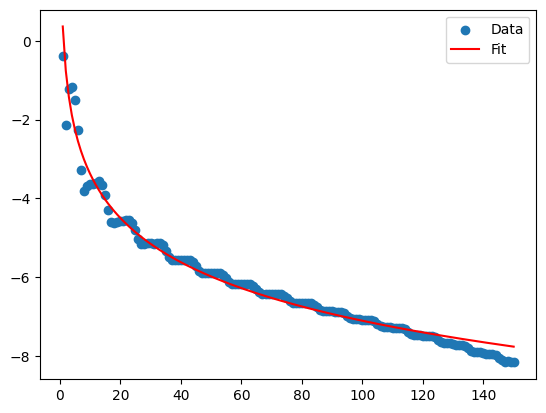

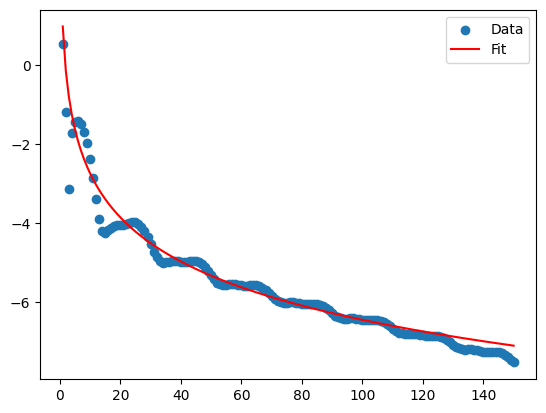

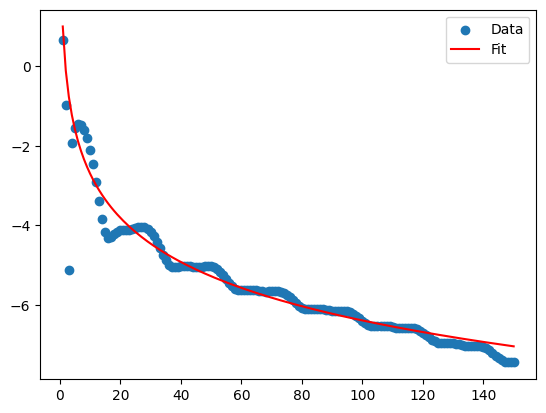

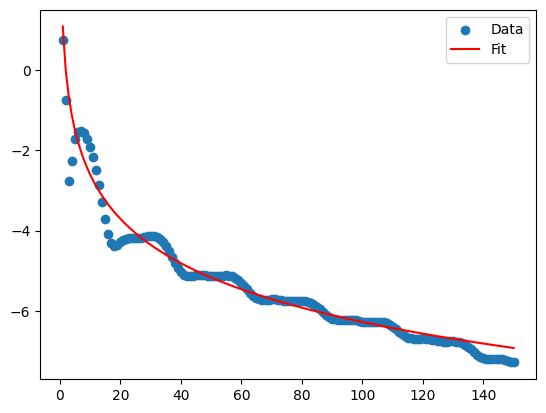

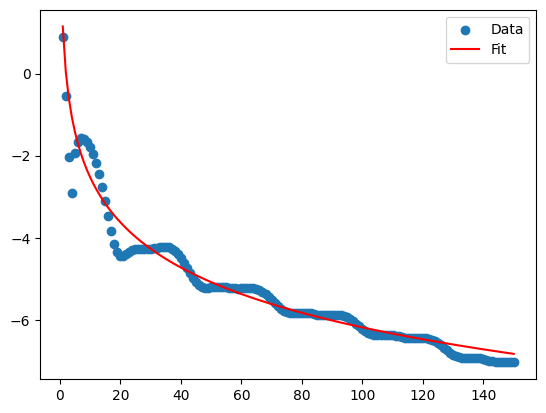

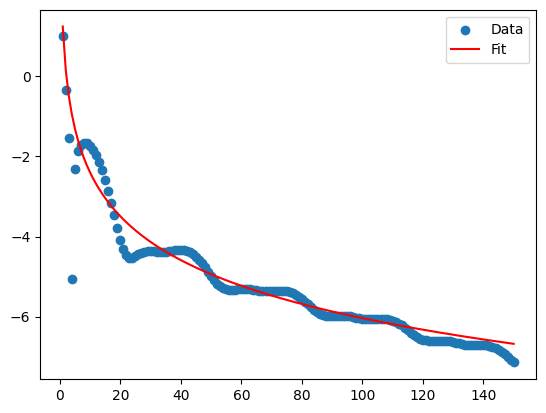

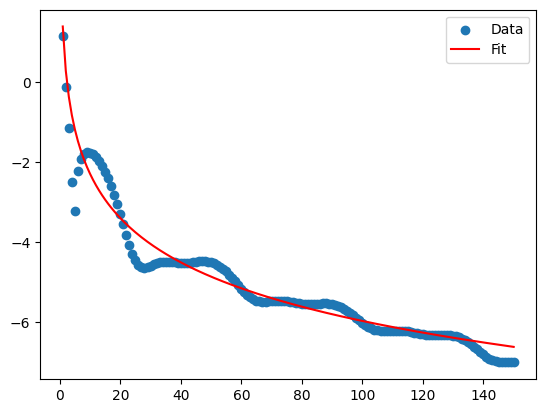

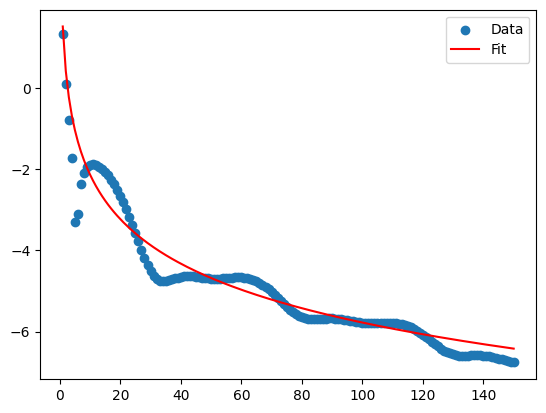

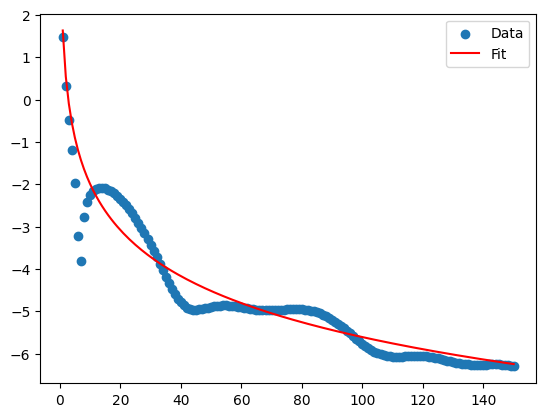

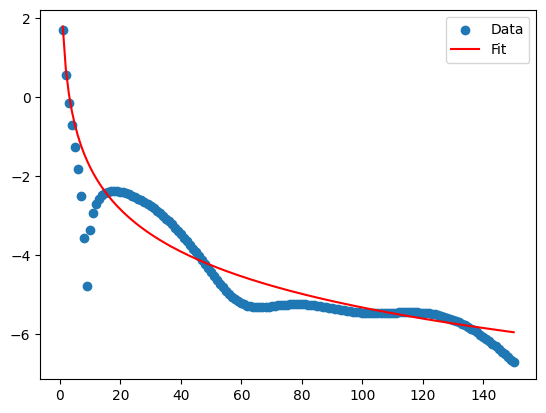

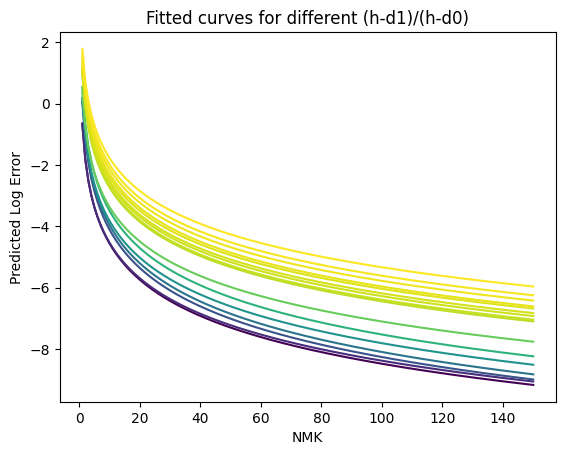

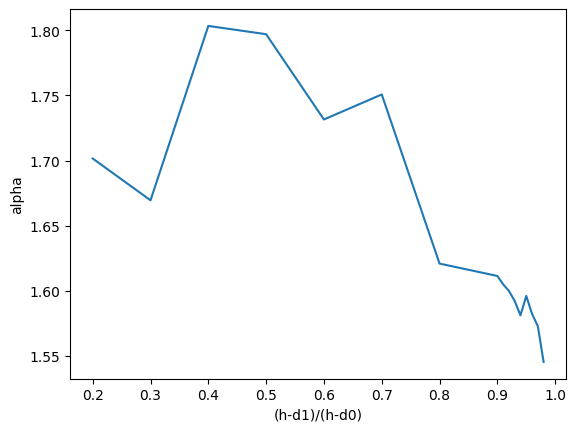

fitted slope: -0.245, slope/avg: -0.149


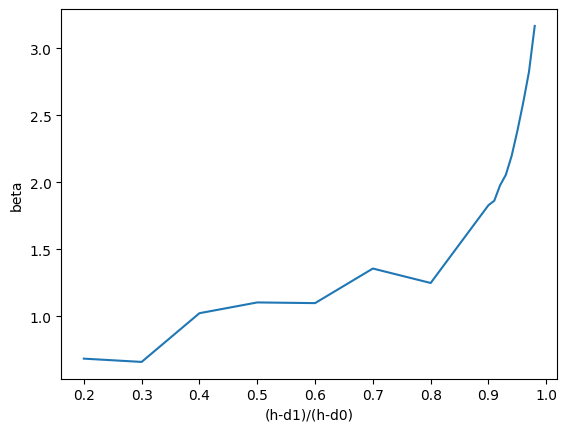

fitted slope: 2.54, slope/avg: 1.45


In [6]:
# Example for how to look more in-depth (possibly bad) fits
# Can attempt to fit w/ local maxima instead of full range.
key = "(h-d1)/(h-d0)"
info = dimensionless_quantities[key]

# subset = info[0][:17] + info[0][18:]
# data = many_data_dicts_to_convergence_plot_data(subset, all_m0s = True)
# colors = color_by_f_value(info[1], subset, all_m0s = True)
# plot_set_convergence_and_log(data, "am", colors = colors, scale = True, alpha = 1,
#                              label_func = (lambda data_dict, m0 : None), error = 0.01,
#                              nmk_max = 150, show_error = True, trunc = 0, smooth = False)
# plot_set_convergence_and_log(data, "dp", colors = colors, scale = True, alpha = 1,
#                              label_func = (lambda data_dict, m0 : None), error = 0.01,
#                              nmk_max = 150, show_error = True, trunc = 0, smooth = False)

pack = multi_fit_parameters(info[0][:16], info[1], "am", sort_label = key,
                          local_maxima = True, plot_comparison = True,
                          print_params = False, plot_multi_log_comparison = True, plot_multi_params = True, nmk_max = 150)
# pack = multi_fit_parameters(info[0][:16], info[1], "dp", sort_label = key,
#                           local_maxima = True, plot_comparison = True,
#                           print_params = False, plot_multi_log_comparison = True, plot_multi_params = True, nmk_max = 150)

In [27]:
key = "radwidth0/dist_to_e"
info = dimensionless_quantities[key]

pack = multi_fit_parameters(info[0], info[1], "dp", sort_label = key,
                          local_maxima = False, plot_comparison = False,
                          print_params = False, plot_multi_log_comparison = False, plot_multi_params = False, nmk_max = 150)
meta_xs, meta_ys2 = pack[0], pack[2]

[1.2265207  0.06062649]


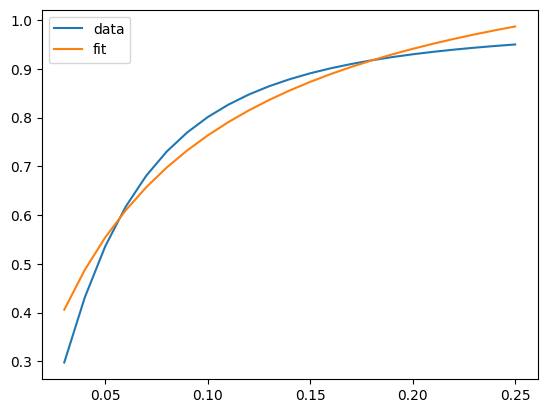

[ 0.94668494  1.2830848  21.36704105]


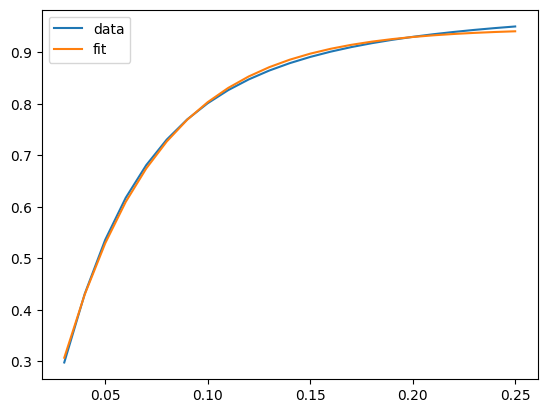

[ 3.18126961 -2.09635183  0.0100907 ]


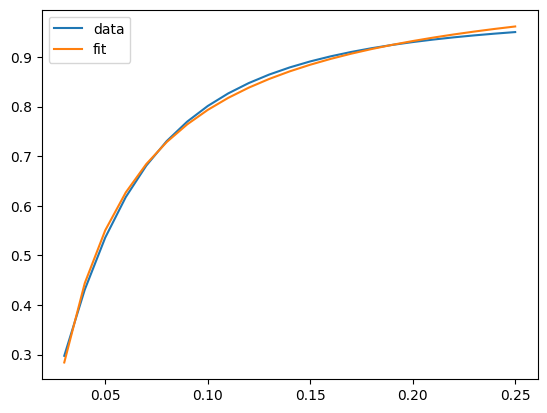

In [28]:
def model1(x, sat, k):
  return sat * (x / (k + x))

def model2(x, sat, mult, k):
  return sat * (1 - mult * np.exp(-k * x))

def model3(x, sat, base, k):
  return base + sat * (x / (k + x))

def try_fit(model, guess, xs, ys):
  popt, pcov = curve_fit(model, xs, ys, p0 = guess)
  print(popt)
  ys_calc = [model(x, *popt) for x in xs]
  plt.plot(xs, ys, label = "data")
  plt.plot(xs, ys_calc, label = "fit")
  plt.legend()
  plt.show()

try_fit(model1, (5.4, 4e-4), meta_xs, meta_ys2)
try_fit(model2, (5.4, 4, 12), meta_xs, meta_ys2)
try_fit(model3, (5.4, 4, 4e-4), meta_xs, meta_ys2)